# Perform forward kinematics with a trajectory

In this notebook, we are going to generate a short video for a random robot movement you can watch in your browser.

First of all, we need some modules. You can create some simple modules built from geometric primitives yourself - there is a distinct tutorial to that purpose. If you don't want to, we can use the set of simple modules provided with the timor source code:

In [5]:
from pathlib import Path

# provide your own filepaths if you already did the module generation tutorial:
your_modules_json = Path('')
your_assets_directory = Path('')

if your_modules_json == Path(''):
    from timor.utilities.file_locations import get_module_db_files
    modules_file = get_module_db_files('geometric_primitive_modules')

Imports here:

In [6]:
import numpy as np
import timor
from timor.Module import *
from timor.utilities.visualization import animation
import matplotlib.pyplot as plt
import itertools
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm


#create the DB object
db = ModulesDB.from_json_file(modules_file)

#print out available modules in DB
print(db.by_name)
print(db.by_id)
# print(db.all_joints)
# print(db.all_connectors)


{'L shaped link 0.1-0.08-15': <timor.Module.AtomicModule object at 0x7f9e6f337e20>, 'Demo EEF': <timor.Module.AtomicModule object at 0x7f9e6f3375e0>, 'L shaped link 0.1-0.08-30': <timor.Module.AtomicModule object at 0x7f9e6f394670>, 'I shaped link 0.08-0.08-30': <timor.Module.AtomicModule object at 0x7f9e6f3361d0>, 'L shaped link 0.1-0.08-45': <timor.Module.AtomicModule object at 0x7f9e6f394e80>, 'I shaped link 0.08-0.08-15': <timor.Module.AtomicModule object at 0x7f9e6f334f40>, 'Revolute Joint': <timor.Module.AtomicModule object at 0x7f9e6f334940>, 'Base': <timor.Module.AtomicModule object at 0x7f9e6f336710>, 'Prismatic Joint': <timor.Module.AtomicModule object at 0x7f9e6f336d40>, 'I shaped link 0.08-0.08-45': <timor.Module.AtomicModule object at 0x7f9e6f337640>}
{'l_15': <timor.Module.AtomicModule object at 0x7f9e6f337e20>, 'eef': <timor.Module.AtomicModule object at 0x7f9e6f3375e0>, 'l_30': <timor.Module.AtomicModule object at 0x7f9e6f394670>, 'i_30': <timor.Module.AtomicModule obje

In [7]:
#contains IDs we care about. The order is arbitrary, but if we want to make a robot out of this (i.e. kinematic tree) we should put in order.
modules = ('base', 'J2', 'i_45', 'J2', 'J2', 'eef')
A = ModuleAssembly.from_serial_modules(db, modules)
robot = A.to_pin_robot() #convert to pinocchio robot

viz = robot.visualize()
viz.viewer.jupyter_cell(height=400) # generate a jupyter cell to visualize the robot

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7012/static/


In [8]:
#arbitrary new joint state
q2 = np.array([np.pi, -np.pi/2, np.pi/2])


"""Forwards Kinematics (FK) and Forwards Dynamics (FD) methods belong to PinRobot object"""
  # FK https://timor-python.readthedocs.io/en/latest/autoapi/timor/Robot/index.html#timor.Robot.PinRobot.fk
  # FD https://timor-python.readthedocs.io/en/latest/autoapi/timor/Robot/index.html#timor.Robot.PinRobot.fd

# FK calculates the relative rigid body transform from the reference config at a given joint angle position. 
# You can tell it to update the collision hitbox and visual mesh if wanted. I don't think this robot can collide with itself.
print(f"Robot end effector coordinate transform at joint state {q2}", robot.fk(configuration = q2, collision = True, visual = True)) #default kind is tcp - tool center point
print(f"Robot joint coordinate transfom at joint state {q2}", robot.fk(configuration = q2, kind = 'joints', collision = True, visual = True))
print(f"Robot full frames coordinate transfom at joint state {q2}", robot.fk(configuration = q2, kind = 'full', collision = True, visual = True))


#visual just updates the state of the visual geometries, we have to actually visualize to see it
vis = robot.visualize()

#Current robot velocities
print(f"Current robot joint positions (configuration): {robot.configuration}")
print(f"Current robot joint velocities: {robot.velocities}")

# FD calculates joint accelerations (ddq) given joint config (q) and joint velocity (dq) 
print(robot.fd(tau = [1, 0, 0], motor_inertia = False, friction = True))
  

Robot end effector coordinate transform at joint state [ 3.14159265 -1.57079633  1.57079633] [[-0.    1.   -0.    0.5 ]
 [-0.   -0.   -1.   -0.19]
 [-1.   -0.    0.    0.8 ]
 [ 0.    0.    0.    1.  ]]
Robot joint coordinate transfom at joint state [ 3.14159265 -1.57079633  1.57079633] ([[ 1.    0.    0.    0.2 ]
 [-0.    1.    0.   -0.  ]
 [ 0.   -0.    1.    0.05]
 [ 0.    0.    0.    1.  ]], [[-0.   0.   1.   0.2]
 [-1.  -0.  -0.   0. ]
 [ 0.  -1.   0.   0.8]
 [ 0.   0.   0.   1. ]], [[-0.   1.  -0.   0.5]
 [-0.  -0.  -1.   0. ]
 [-1.  -0.   0.   0.8]
 [ 0.   0.   0.   1. ]])
Robot full frames coordinate transfom at joint state [ 3.14159265 -1.57079633  1.57079633] ([[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]], [[ 1.  0.  0.  0.]
 [ 0. -1. -0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  1.]], [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]], [[-0.   -0.    1.    0.05]
 [ 0.   -1.    0.    0.  ]
 [ 1.    0.    0.    0.05]
 [ 0.    0.    0.    1.  ]], [[-0.    0

## Reachability using Forward Kinematics
Using the joint space, we compute a list of reachable poses for a given robot. A pose is reachable if:
1. there are no self collisions after the transformation
2. there are no collisions with any obstacles in the task (or environment) after transformation
3. you can reach the target pose from the previous pose (for now, we assume the prev pose to be the initial configuration) - in other words, the path traveled while the transformation is applied to the robot causes no collision

In [9]:
def specific_pose_valid(robot, theta, task = None) -> bool:
	"""
	Given a robot at a specific pose, evaluate whether it is a valid pose (contains no collision).
	TODO: reach target pose from the previous pose

	Args:
		robot (timor.Robot.PinRobot): robot
		theta (list[float]): joint angles configuration
		task (timor.task.Task, optional): environment with obstacles. Defaults to None.

	Returns:
		bool: (for now) True if robot has no collision, False otherwise 
	"""		
	# perform FK on the theta list
	g = robot.fk(theta, visual = True, collision = True)

	self_collisions = robot.has_self_collision()
	collisions = False if task is None else robot.has_collisions(task, safety_margin=0) # TODO may need to alter safety margin

	return not (collisions or self_collisions)

In [10]:
"""Test: Example of manually defined trajectory with Forwards Kinematics (pt 1)"""

modules = ('base', 'i_30', 'J2', 'J2', 'J2', 'i_30', 'eef')
B = ModuleAssembly.from_serial_modules(db, modules)
long_robot = B.to_pin_robot() #convert to pinocchio robot

q_0 = [np.pi, np.pi, np.pi] #start in this config with no collisions

no_collision_eff = long_robot.fk(q_0, collision = True, visual = True)

#the collisions() method exists, but requires the definition of a task. we look at collision pairs as a quick shortcut.
print("Self collision in this state: ", long_robot.has_self_collision())
long_robot.visualize_self_collisions() #nothing is highlighted b/c no self collisions

print(q_0)
print("--Specific pose valid: ", specific_pose_valid(long_robot, q_0))

q_1 = [0.0,0.0,0.0] #this has collision
collision_eff = long_robot.fk(q_1, collision = True, visual = True)
print(collision_eff)

#the collisions() method exists, but requires the definition of a task. we look at collision pairs as a quick shortcut.
print("Self collision in this state: ", long_robot.has_self_collision())
long_robot.visualize_self_collisions() #nothing is highlighted b/c no self collisions

print(q_1)
print("==Specific pose valid: ", specific_pose_valid(long_robot, q_1))

Self collision in this state:  False
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7014/static/
[3.141592653589793, 3.141592653589793, 3.141592653589793]
--Specific pose valid:  True
[[ 1.    0.    0.    0.2 ]
 [-0.   -1.   -0.   -0.  ]
 [ 0.    0.   -1.   -0.14]
 [ 0.    0.    0.    1.  ]]
Self collision in this state:  True
collision pair detected: 1 , 11 - collision: Yes
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7015/static/
[0.0, 0.0, 0.0]
==Specific pose valid:  False


In [11]:
def find_all_valid_poses(robot, angle_interval=100, world_res=0.01, task = None) -> list[tuple[float, float, float]]:
    """
    Finds all the valid poses that are reachable by iterating through the robot's joint space.

    Args:
        robot (timor.Robot.PinRobot): our robot
        angle_interval (int): how many times do we split the range of angles from 0 to 2pi
        world_res (float): used to round the valid poses (argument should look like 0.01m)
        task (timor.task.Task, optional): task containing obstacles. Defaults to None.

    Returns:
        list[tuple[float, float, float]]: a list containing all valid poses x, y, z in the world space
    """
    # Generate all possible combinations of joint angles
    num_joints = len(robot.joints)
    angles = np.linspace(0, 2 * np.pi, angle_interval)
    all_angles_combo = itertools.product(angles, repeat=num_joints)
    
    # To store all valid poses, multiple joint combos may result in the same end-effector position
    valid_poses = set()
    rounding = int(-math.log10(world_res)) # 0.01 resolution corresponds to rounding a number to 2 decimal places
    
    for theta in all_angles_combo:
        # print("Testing theta comb: ", theta) # for testing
        
        if (specific_pose_valid(robot, theta, task)):
            # extract the end-effector position from g
            g = robot.fk(theta, visual = True, collision = True)
            end_effector_pose = tuple(round(coord, rounding) for coord in g[:3, 3].flatten())
            valid_poses.add(end_effector_pose)
            
    return list(valid_poses)

### Visualization of reachability (FK)

In [12]:
def plot_reachability(reachable_points):
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Convert lists to numpy arrays for easier plotting
    reachable_points = np.array(reachable_points)

    # Plot reachable points in green
    if len(reachable_points) > 0:
        ax.scatter(reachable_points[:, 0], reachable_points[:, 1], reachable_points[:, 2], color='green', label='Reachable', s=5)

    # Set plot labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Reachability Plot')
    ax.legend()

    plt.show()


In [13]:
# Interactive version

import plotly.graph_objects as go
import numpy as np

def plot_interactive_reachability(reachable_points):
    # Convert lists to numpy arrays for easier plotting
    reachable_points = np.array(reachable_points)

    # Create a 3D scatter plot with Plotly
    fig = go.Figure()

    # Plot reachable points in green
    if len(reachable_points) > 0:
        fig.add_trace(go.Scatter3d(
            x=reachable_points[:, 0],
            y=reachable_points[:, 1],
            z=reachable_points[:, 2],
            mode='markers',
            marker=dict(size=3, color='green'),
            name='Reachable'
        ))

    # Set plot labels and title
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        title='3D Reachability Plot'
    )

    fig.show()


### Find reachability percentage (FK)
We split the world 3d space into smaller cubes, and return the percentage of the space covered by our robot configuration

In [14]:
def find_reachibility_percentage(valid_poses, world_dim = [1.00, 1.00, 1.00], world_res = 0.01):
    """Calculate the percentage of the world space that is reachable by our robot configuration.

    Args:
        valid_poses (list[tuple[float, float, float]]): list of (x,y,z) poses that the end effector can reach.
            We assume that the poses are rounded to the world_resolution!
        world_dim (list[float, float, float]): _description_
        world_res (float): how much to split the world (eg, 0.01m increments)

    Returns:
        float: percentage of world space that is reachable
    """
    total_cubes = (world_dim[0] / world_res) * (world_dim[1] / world_res) * (world_dim[2] / world_res)
    print("total cubes", total_cubes)
    reachable_count = len(valid_poses)
    print("reachable count: ", reachable_count)
    return round((reachable_count / total_cubes) * 100, 2)

### Test: find all valid poses, reachability percentage and visualization

First, load and visualize the robot:

In [15]:
from timor.utilities import prebuilt_robots
modules = ('base', 'i_30', 'J2', 'J2', 'J2', 'i_30', 'eef')
B = ModuleAssembly.from_serial_modules(db, modules)
long_robot = B.to_pin_robot() #convert to pinocchio robot
long_robot = default_robot = prebuilt_robots.get_six_axis_modrob()
viz = long_robot.visualize()
viz.viewer.jupyter_cell(height=400) # generate a jupyter cell to visualize the robot

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7016/static/


Now, find all valid poses -- this will take around 40 seconds

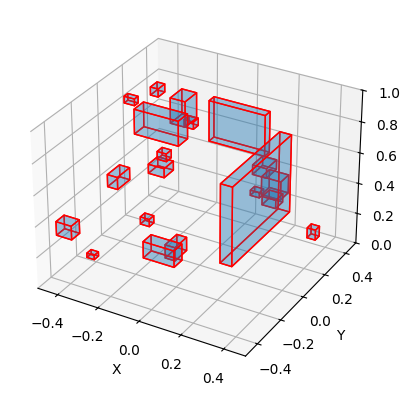

20
[<timor.task.Obstacle.Obstacle object at 0x7f9e6e0df1f0>, <timor.task.Obstacle.Obstacle object at 0x7f9e6e0df070>, <timor.task.Obstacle.Obstacle object at 0x7f9e6e0def20>, <timor.task.Obstacle.Obstacle object at 0x7f9e6ea9ed70>, <timor.task.Obstacle.Obstacle object at 0x7f9e5ff11060>, <timor.task.Obstacle.Obstacle object at 0x7f9e5ff103d0>, <timor.task.Obstacle.Obstacle object at 0x7f9e5ff4d7b0>, <timor.task.Obstacle.Obstacle object at 0x7f9e5ff4d900>, <timor.task.Obstacle.Obstacle object at 0x7f9e5ff4da50>, <timor.task.Obstacle.Obstacle object at 0x7f9e5ff4dba0>, <timor.task.Obstacle.Obstacle object at 0x7f9e5ff4dcf0>, <timor.task.Obstacle.Obstacle object at 0x7f9e5ff4de40>, <timor.task.Obstacle.Obstacle object at 0x7f9e5ff4df90>, <timor.task.Obstacle.Obstacle object at 0x7f9e5ff4e0e0>, <timor.task.Obstacle.Obstacle object at 0x7f9e5ff4e230>, <timor.task.Obstacle.Obstacle object at 0x7f9e5ff4e380>, <timor.task.Obstacle.Obstacle object at 0x7f9e5ff4e4d0>, <timor.task.Obstacle.Obstac

In [16]:
import datetime
import time
import sys
import os
import numpy as np
from timor.Geometry import Box, ComposedGeometry, Cylinder
from timor.task.Obstacle import Obstacle
from timor.task.Task import Task, TaskHeader
from timor.utilities.transformation import Transformation
from timor.utilities.spatial import rotX, rotY, rotZ

project_root = os.path.abspath(os.path.join(os.getcwd(), '../'))
sys.path.append(project_root)

from random_env_generation.random_env_generation import plot_random_cuboids, plot_random_cuboids_with_reachability, plot_reachability_interactive

cuboid_data_list = plot_random_cuboids(space_size=(1.0, 1.0, 1.0))

header = TaskHeader(
    ID='Random Obstacles Generation',
    tags=['Capstone', 'demo'],
    date=datetime.datetime(2024, 10, 28),
    author=['Jonas Li'],
    email=['liyunzhe.jonas@berkeley.edu'],
    affiliation=['UC Berkeley']
)

box = []
for idx, info in enumerate(cuboid_data_list):
    size, displacement = info["size"], info["origin"]
    box.append(Obstacle(ID=str(idx), 
                collision=Box(
                    dict(x=size['x'], y=size['y'], z=size['z']),  # Size
                    pose=Transformation.from_translation([displacement['x'] + size['x'] / 2, displacement['y'] + size['y'] / 2, displacement['z'] + size['z'] / 2])
                )))# Displacement
print(len(box))
print(box)
print("Cube data: ", cuboid_data_list)
task = Task(header, obstacles=[i for i in box])
task.visualize(robots=long_robot)

In [17]:
header = TaskHeader(
    ID='Pick & Place',
    tags=['IROS2023', 'demo'],
    date=datetime.datetime(2022, 9, 15),
    author=['Jonathan Külz'],
    email=['jonathan.kuelz@tum.de'],
    affiliation=['Technical University of Munich']
)
height = .2
plateau_height = .3
r_leg = 0.05
dx = 1.0
dy = .8
dz = .05
plateau_placement = Transformation.from_translation([.3 * 0.5, .2 * 0.5, 0.3*0.5])
plateau = Obstacle(ID='plateau',
                collision=Box(dict(x=.3, y=.2, z=plateau_height), pose=plateau_placement))
task2 = Task(header, obstacles=[plateau])
task2.visualize()

2024-11-21 22:23:37,753 Timor INFO Cannot recenter visualizer view to base.


You can open the visualizer by visiting the following URL:
http://127.0.0.1:7018/static/


In [18]:
how_many_times_to_split_angle_range = 100
world_resolution = 0.01
world_dimension = [1.00, 1.00, 1.00]

valid_poses = find_all_valid_poses(long_robot, how_many_times_to_split_angle_range, world_resolution, task)



KeyboardInterrupt: 

In [60]:
print(valid_poses)
long_robot.visualize()

[(0.58, -0.33, -0.12), (0.58, 0.3, -0.14), (0.93, 0.3, 0.12), (0.83, -0.35, 0.04), (0.95, -0.21, 0.07), (0.89, 0.32, 0.62), (0.94, -0.32, 0.18), (-0.01, -0.1, 0.59), (0.86, -0.38, 0.12), (0.63, 0.51, 0.12), (0.37, -0.36, -0.08), (0.99, 0.18, 0.59), (0.5, -0.53, 0.12), (0.38, 0.44, 0.69), (0.75, 0.26, 0.8), (0.86, -0.43, 0.2), (0.51, 0.57, 0.33), (0.33, -0.27, -0.12), (0.67, -0.4, -0.03), (0.01, -0.28, 0.48), (0.18, -0.23, 0.77), (0.76, -0.31, 0.75), (0.53, -0.53, 0.57), (0.24, -0.31, 0.75), (0.08, 0.14, 0.72), (0.33, -0.26, -0.13), (0.38, -0.29, -0.13), (1.05, 0.06, 0.51), (1.07, -0.05, 0.42), (0.99, 0.2, 0.57), (0.34, 0.41, 0.72), (0.7, 0.22, 0.84), (0.49, 0.33, 0.82), (0.48, -0.34, 0.81), (0.86, 0.27, -0.0), (0.9, -0.16, 0.74), (0.29, -0.53, 0.39), (1.06, -0.13, 0.3), (0.68, -0.25, 0.84), (0.55, -0.3, -0.14), (0.1, -0.19, 0.72), (-0.07, 0.07, 0.42), (0.09, -0.08, -0.04), (-0.04, -0.15, 0.23), (0.91, -0.24, 0.67), (0.33, -0.5, 0.57), (1.07, -0.09, 0.3), (0.15, -0.14, 0.79), (1.01, -0.

Now, print the reachability percentage and visualize the reachable poses

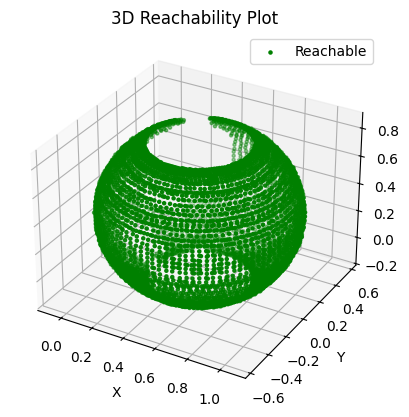

total cubes 1000000.0
reachable count:  6096
long robot can reach:  0.61 % of the  [1.0, 1.0, 1.0]  world with  0.01  resolution


In [45]:
plot_reachability(valid_poses)
percentage = find_reachibility_percentage(valid_poses)
print("long robot can reach: ", percentage, "% of the ", world_dimension, " world with ", world_resolution, " resolution")

Let's try an interactive plot

In [46]:
plot_interactive_reachability(valid_poses)
reachable_points, unreachable_points = plot_random_cuboids_with_reachability(cuboid_data_list, reachable_points=valid_poses, unreachable_points=[])

In [65]:
# visualize points with robot and obstacles:
from timor.task.Task import Task, TaskHeader
from timor.Geometry import Sphere
from timor.task.Obstacle import Obstacle
from meshcat.geometry import MeshToonMaterial
"""Adding a robot with an object"""
header = TaskHeader(
    ID='reachability_visualized',
    tags=['Capstone', 'demo'],
    date=datetime.datetime(2024, 10, 28),
    author=['Shankar Kailas'],
    email=['shankar_kailas@berkeley.edu'],
    affiliation=['UC Berkeley']
)


reachable_points_obst = [Obstacle(ID=str(i), collision=Sphere({'r': .003}, pose=Transformation.from_translation(point))) for i, point in enumerate(reachable_points)]
for item in reachable_points_obst:
    item.mesh_material = MeshToonMaterial(color=0x00ff00, opacity = 0.3)

unreachable_points_obst = [Obstacle(ID=str(i+len(reachable_points)), collision=Sphere({'r': .005}, pose=Transformation.from_translation(point))) for i, point in enumerate(unreachable_points)]
for item in unreachable_points_obst:
    item.mesh_material = MeshToonMaterial(color=0xFF0000, opacity = 0.3)


for item in box:
    item.mesh_material = MeshToonMaterial(color=0x0000FF, opacity = 0.5)



task = Task(header, obstacles=reachable_points_obst+unreachable_points_obst+box)

task.visualize(robots=long_robot)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7007/static/


In [29]:
def find_trajectory(robot, base_config, target_config, task = None, max_rrt_iters: int = 10000, rrt_step_size: float = 0.1, target_distance_thresh: float = 0.2):
	'''
		Checks if a target pose is reachable from a base pose through any valid trajectory. 
		Returns a valid trajectory if found. Does not guarantee anything close to optimality.
		
		This implementation uses Rapidly-exploring Random Trees (RRT).

		IMPORTANT - this function works entirely within the joint space. no calculation of actual end effector position is done. this matters for the target distance threshold!

		Parameters:
			- robot
			- target_config
			- base_config
			- task
			- max_rrt_iters
			- rrt_step_size
			- target_distance_thresh

		Returns:
			- the path taken if a trajectory exists. None otherwise

		TODO:
			- make the tree an actual tree - this impl is a little scuffed
	'''

	#if the base or target poses are invalid, no trajectory is possible.	
	if not specific_pose_valid(robot, base_config, task) or not specific_pose_valid(robot, target_config, task):
		return None

	#each node in the tree contains a tuple of (joint_angles: List[float], parent: Integer) - parent is the parent index 
	tree = [base_config]
	idx_to_parent = dict()
	idx_to_parent[0] = -1

	#nx2 arr - of lower and upper angle limits for each joint
	joint_space_bounds = robot.joint_limits
	low_bounds, high_bounds = joint_space_bounds[0], joint_space_bounds[1]

	#RRT Algo
	for _ in range(max_rrt_iters):
		# Sample random configuration
		random_config = np.random.uniform(low_bounds, high_bounds)
		
		# Find nearest node in the tree
		nearest_config_idx, nearest_config = min(enumerate(tree), key=lambda x: np.linalg.norm(x[1] - random_config))
		
		# Extend towards random config
		new_config = nearest_config + rrt_step_size * (random_config - nearest_config) / np.linalg.norm(random_config - nearest_config)
		#if the new config that we step into is valid, add it to the tree. we can 
		if specific_pose_valid(robot, new_config, task):
			# print(new_config, len(tree))
			#append a new config and its parent's idx in the tree
			idx_to_parent[len(tree)] = nearest_config_idx
			tree.append(new_config)
			
			# Check if we've reached the target. if so, return
			if np.linalg.norm(new_config - target_config) < target_distance_thresh:
				full_path = [target_config]

				next_node, parent_idx = new_config, nearest_config_idx

				while parent_idx != -1:
					full_path.insert(0, next_node)
					next_node, parent_idx = tree[parent_idx], idx_to_parent[parent_idx]

				return full_path
	
	#no trajectories are valid. return None
	return None

In [30]:
from collections import deque

def linear_trajectory_valid(robot, base_config, target_config, task = None, num_waypoints = 20):
    linear_trajectory = np.linspace(base_config, target_config, num_waypoints)
    
    for i in range(linear_trajectory.shape[0]):
        theta = linear_trajectory[i]
        if not specific_pose_valid(robot, theta, task):
            return False
    
    return True

def prm_reachability(robot, base_config = None, prm_num_samples = 10000, max_connection_distance = 0.1, task = None):
    """
    Generate a probabilistic roadmap (PRM) and find reachable points in the workspace.
    
    Args:
        base_config: Initial robot configuration (joint angles).
        num_samples: Number of random configurations to sample.
        max_connection_distance: Maximum distance between samples for connectivity.
        (no sampling method) - we will use uniform sampling for this impl. Can consider gaussian distr later.
        
    Returns:
        reachable_points: List of configurations that are reachable from start_configuration.
    """
    if base_config is None:
        base_config = np.zeros_like(robot.configuration)

    if not specific_pose_valid(robot, base_config, task):
        return []
    
	# 1. Sample random configurations in the C-space
    samples = [base_config]
    joint_space_bounds = robot.joint_limits
    low_bounds, high_bounds = joint_space_bounds[0], joint_space_bounds[1]
    for _ in range(prm_num_samples):
        random_config = np.random.uniform(low_bounds, high_bounds)
        
        if specific_pose_valid(robot, random_config, task):  # Only add configurations that are collision-free
            samples.append(random_config)
    
    #this will be useful for indexing later - can undo this if we want
    samples = np.array(samples) 


     # 2. Build the PRM graph (roadmap). 
     # Since we are trying to find all points reachable from the start, we do smth a little different than traditional PRM. 

    VS = set([0])

    queue = deque()
    queue.append(0)

    reachable_points = [base_config]
    while len(queue) > 0:
        curr = samples[queue.popleft()]
        
        #iterate over all points (this is slow, yes) and see if we can add to tree. 
        for i in range(samples.shape[0]):
            if i not in VS and np.linalg.norm(curr - samples[i]) < max_connection_distance:
                #we have to test if the trajectory between two points in config space is valid. 
                #for now, I use a simple linear trajectory, but in the future, it may be useful to do RRT or smth here 
                if linear_trajectory_valid(robot, curr, samples[i], task):
                    #add to tree?
                    reachable_points.append(samples[i])
                    VS.add(i)
                    queue.append(i)
        
    return reachable_points

In [31]:
traj = find_trajectory(robot, [0, 0, 0], [np.pi/2, np.pi, np.pi/2], target_distance_thresh = 1)
    
if traj:
    traj = np.array(traj)
    print(f"Found trajectory of length {traj.shape[0]}: \n{traj}")
    animation(robot, traj, .1)

Found trajectory of length 54: 
[[ 0.06210295 -0.05210612  0.05855063]
 [ 0.14219219 -0.09945814  0.02189685]
 [ 0.23111842 -0.09468846  0.06738725]
 [ 0.28821844 -0.10463835  0.14887705]
 [ 0.30136033 -0.17036166  0.22309118]
 [ 0.39656744 -0.20018135  0.2299024 ]
 [ 0.45037304 -0.25828479  0.2909675 ]
 [ 0.52644009 -0.32291549  0.29702372]
 [ 0.60965637 -0.35965456  0.33856034]
 [ 0.64417906 -0.29235741  0.40397653]
 [ 0.65565399 -0.25420093  0.49569572]
 [ 0.70032312 -0.17431006  0.53597124]
 [ 0.72583201 -0.10527058  0.60366797]
 [ 0.80850798 -0.05281602  0.62399537]
 [ 0.8609708   0.00654289  0.68502138]
 [ 0.94568037  0.04963198  0.71612795]
 [ 0.93703073  0.14322147  0.7502775 ]
 [ 1.02926243  0.15248859  0.78779329]
 [ 1.09071578  0.22583738  0.75875123]
 [ 1.07931312  0.29087268  0.83385376]
 [ 1.1192491   0.3815303   0.84750339]
 [ 1.14377728  0.47585674  0.82512277]
 [ 1.20842426  0.49665578  0.89852691]
 [ 1.23311032  0.58912703  0.92750392]
 [ 1.22662848  0.68614675  0.904

In [32]:
reachable_poses = prm_reachability(robot, prm_num_samples = 10000, max_connection_distance = 1)
print(f'Found {len(reachable_poses)} reachable poses: {reachable_poses}')

Found 10001 reachable poses: [array([0., 0., 0.]), array([0.08272222, 0.26508293, 0.4963592 ]), array([ 0.05043073, -0.53803158,  0.50972461]), array([ 0.32600673, -0.02360484, -0.6664334 ]), array([-0.2165263 , -0.68695614,  0.68819876]), array([ 0.16643976, -0.42037624, -0.28777379]), array([ 0.46546082, -0.51538747,  0.32677583]), array([-0.18754237, -0.82110775,  0.35943502]), array([ 0.15047176,  0.4750189 , -0.40645046]), array([-0.89973462,  0.14904719, -0.2190466 ]), array([ 0.46835149,  0.30181358, -0.65754263]), array([-0.37369344,  0.26738255,  0.6936859 ]), array([-0.25788366,  0.45346162,  0.14272047]), array([ 0.41047878, -0.34306133, -0.73231336]), array([0.25123401, 0.524139  , 0.48461949]), array([ 0.40040247, -0.62123297, -0.14937174]), array([0.10300885, 0.35892438, 0.16512495]), array([ 2.54838806e-01, -3.58083479e-04,  9.11277146e-01]), array([ 0.36333619, -0.34379749,  0.62959414]), array([-0.82694976,  0.50762281,  0.22532817]), array([-0.03155603, -0.09950663,  

In [33]:
from timor.utilities.transformation import Transformation
from timor.utilities.tolerated_pose import ToleratedPose

no_collision_t = Transformation(no_collision_eff)
no_collision_pose = ToleratedPose(no_collision_t)

In [34]:
def inverse_kinematics(robot, eff_pose):
    transformation = Transformation(eff_pose)
    tolerated_pose = ToleratedPose(transformation)
    
    return robot.ik(tolerated_pose)

In [35]:
#print(long_robot.ik(no_collision_pose))
print(inverse_kinematics(long_robot, no_collision_eff))
print(inverse_kinematics(long_robot, collision_eff))
#print(long_robot.ik(collision_eff))

(array([ 3.14159265,  3.14159265, -3.14159265]), True)


2024-11-14 19:25:24,673 Timor INFO IK failed to converge.


(array([ 0.28882195,  2.18538401, -2.40538011]), False)


In [36]:
def check_reachable_cubes(robot, space_dimensions, segment_len, error):
    # Extract the x, y, z dimensions of the main cube
    x_dim, y_dim, z_dim = space_dimensions

    # Initialize lists to store the coordinates of reachable and unreachable centers
    reachable_points = []
    unreachable_points = []
    reachable_config = []

    # Generate the ranges for each axis with 0.1m increments
    x_range = np.arange(-x_dim / 2, x_dim / 2 + segment_len, segment_len)
    y_range = np.arange(-y_dim / 2, y_dim / 2 + segment_len, segment_len)
    z_range = np.arange(0, z_dim, segment_len)
    
    progress = 0
    # Iterate through each small cube's center
    total_iterations = len(x_range) * len(y_range) * len(z_range)
    with tqdm(total=total_iterations, desc="Overall Progress", position=0) as pbar:
        for x in x_range:
            for y in y_range:
                for z in z_range:
                    # Define a target 4x4 transformation matrix for the cube center
                    target_matrix = np.array([
                        [1, 0, 0, x],
                        [0, 1, 0, y],
                        [0, 0, 1, z],
                        [0, 0, 0, 1]
                    ])
                    
                    # Check reachability and store the center accordingly
                    pose, success = inverse_kinematics(robot, target_matrix)
                    if success:
                        reachable_points.append([x, y, z])
                        reachable_config.append(pose)
                    else:
                        end_eff = robot.fk(pose, collision = True, visual = True)
                        target_point = np.array([x,y,z])
                        actual_point = np.array([end_eff[0][3], end_eff[1][3], end_eff[2][3]])
                        distance = np.linalg.norm(target_point - actual_point)
                        
                        if distance < error:
                            reachable_points.append([x, y, z])
                            reachable_config.append(pose)
                        else:
                            unreachable_points.append([x, y, z])
                    pbar.update(1)
                    # progress += 1
                    # print("Progress: ", progress/(len(x_range) * len(y_range) * len(z_range)))

    return reachable_points, unreachable_points, reachable_config

def plot_reachability(reachable_points, unreachable_points):
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Convert lists to numpy arrays for easier plotting
    reachable_points = np.array(reachable_points)
    unreachable_points = np.array(unreachable_points)

    # Plot reachable points in green
    if len(reachable_points) > 0:
        ax.scatter(reachable_points[:, 0], reachable_points[:, 1], reachable_points[:, 2], color='green', label='Reachable', s=5)

    # Plot unreachable points in red
    if len(unreachable_points) > 0:
        ax.scatter(unreachable_points[:, 0], unreachable_points[:, 1], unreachable_points[:, 2], color='red', label='Unreachable', s=5)

    # Set plot labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Reachability Plot')
    ax.legend()

    plt.show()

Overall Progress:   0%|          | 0/100 [00:00<?, ?it/s]

2024-11-14 19:25:25,812 Timor INFO IK failed to converge.
Overall Progress:   5%|▌         | 5/100 [00:06<02:01,  1.28s/it]/home/llama/miniconda3/envs/timor/lib/python3.10/site-packages/timor/Robot.py:48: RuntimeWarning:

invalid value encountered in arccos

2024-11-14 19:25:32,245 Timor INFO IK failed to converge.
Overall Progress: 100%|██████████| 100/100 [02:16<00:00,  1.37s/it]


Reachable space %:  0.03


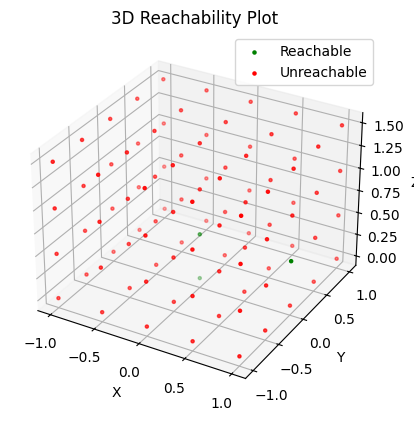

In [37]:
space_dimensions = [2.0, 2.0, 2.0]
reachable_points, unreachable_points, reachable_configs = check_reachable_cubes(long_robot, space_dimensions, 0.5, 0.1)
print("Reachable space %: ", len(reachable_points) / (len(reachable_points) + len(unreachable_points)))
plot_reachability(reachable_points, unreachable_points)

In [38]:
print("Reachable space %: ", len(reachable_points) / (len(reachable_points) + len(unreachable_points)))
print(reachable_points)
for i in range(len(reachable_configs)):
    end_eff = long_robot.fk(reachable_configs[i], collision = True, visual = True)
    print(end_eff)
    target_point = np.array(reachable_points[i])
    actual_point = np.array([end_eff[0][3], end_eff[1][3], end_eff[2][3]])
    print(actual_point)
    distance = np.linalg.norm(target_point - actual_point)
    print("Distance: ", distance)

Reachable space %:  0.03
[[0.0, 0.0, 0.0], [0.0, 0.0, 0.5], [1.0, 0.0, 0.5]]
[[-0.     0.807 -0.591  0.022]
 [ 0.807  0.35   0.477 -0.   ]
 [ 0.591 -0.476 -0.651  0.031]
 [ 0.     0.     0.     1.   ]]
[ 2.21069958e-02 -4.95584982e-06  3.10669717e-02]
Distance:  0.03812972619535608
[[ 0.129  0.604 -0.786 -0.043]
 [-0.477  0.733  0.485 -0.018]
 [ 0.869  0.313  0.383  0.538]
 [ 0.     0.     0.     1.   ]]
[-0.04278655 -0.01771207  0.53753412]
Distance:  0.05960886140130856
[[ 0.566  0.287  0.773  1.044]
 [ 0.287  0.811 -0.511  0.   ]
 [-0.773  0.511  0.377  0.535]
 [ 0.     0.     0.     1.   ]]
[1.04407879e+00 3.31267293e-05 5.34603010e-01]
Distance:  0.05603845942749371
